# Grover experiment for N=5 qubits



#### We dismantle here a Grover circuit to see what is going on inside it. First, we make a standard measurement for 1024 shots in 1 iteration.

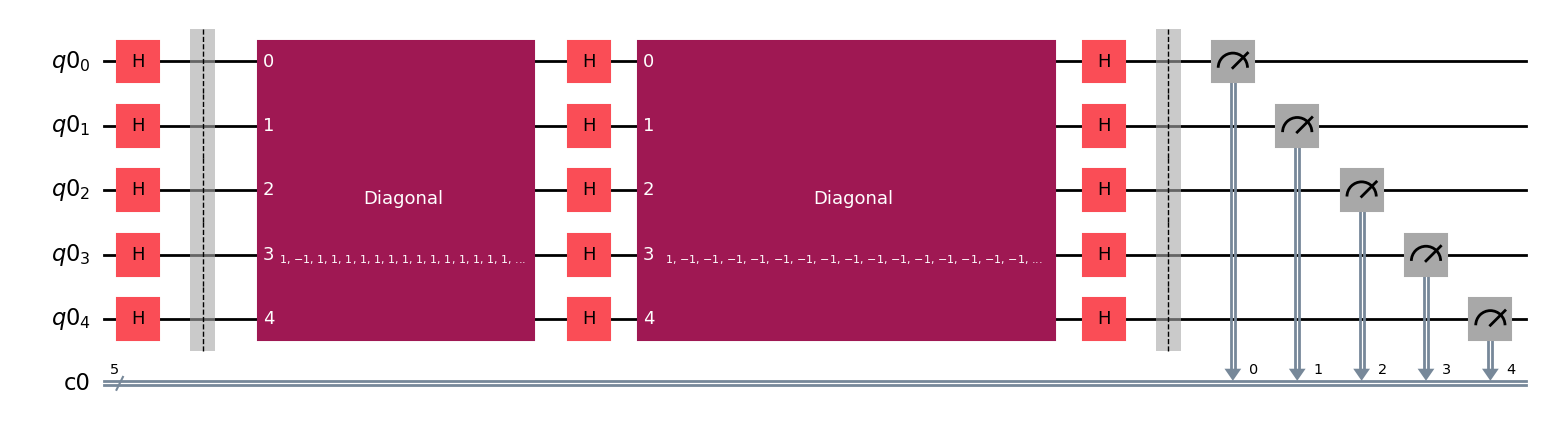

In [1]:
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister
from qiskit.circuit.library import DiagonalGate
import numpy as np
cr1 = ClassicalRegister(5)
qr = QuantumRegister(5)
qc = QuantumCircuit(qr, cr1)
for i in range(0,5):
    qc.h(i)
    qc.barrier(i)
array = [1,-1]
for i in range(30):
    array.append(1) 
qc.append(DiagonalGate(array), [0,1,2,3,4])
for i in range(0,5):
    qc.h(i)
array2 = [1]
for j in range(31):
    array2.append(-1)
qc.append(DiagonalGate(array2), [0,1,2,3,4])
for i in range(0,5):
    qc.h(i)
    qc.barrier(i)

qc.measure([0,1,2,3,4],cr1)
qc.draw(output='mpl')

In [2]:
from qiskit_aer import Aer
from qiskit import transpile

backend = Aer.get_backend('aer_simulator')
qc_transpiled = transpile(qc, backend)
job = backend.run([qc_transpiled])
results = job.result().get_counts()
print(results)
print(len(results))

{'00001': 269, '11101': 23, '00011': 28, '10111': 14, '01111': 35, '00110': 26, '11110': 26, '11100': 28, '11001': 22, '00000': 40, '10010': 22, '01100': 31, '10001': 26, '10011': 33, '01110': 22, '10100': 26, '00010': 23, '00111': 24, '01001': 22, '11010': 14, '11011': 31, '00101': 22, '11000': 21, '01000': 22, '10000': 26, '01011': 24, '11111': 27, '10101': 17, '01010': 26, '01101': 22, '00100': 19, '10110': 13}
32


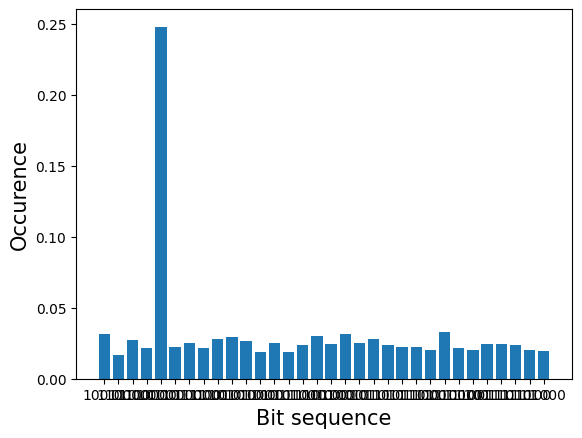

In [3]:
import matplotlib.pyplot as plt

x1 = list(results.keys())
y1 = list(results.values())
y_cor = []
for i in y1:
    x = i / 1024 #If shots = 1024. For other values, one must change it 
    y_cor.append(x)
plt.bar(x1,y_cor)
plt.ylabel('Occurence', size=15)
plt.xlabel('Bit sequence', size=15)
plt.show()

#### At this point we start using Statevector function that clarify our state throught all steps of Grover algorithm

In [4]:
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister
from qiskit.circuit.library import DiagonalGate
import numpy as np
from qiskit.quantum_info import Statevector
cr1 = ClassicalRegister(5)
qr = QuantumRegister(5)
qc = QuantumCircuit(qr, cr1)
for i in range(0,5):
    qc.h(i)
    qc.barrier(i)
state = Statevector.from_instruction(qc)
print("First part:")
print(state)
print(np.abs(state.data**2))
array = [1,-1]
for i in range(30):
    array.append(1) 
qc.append(DiagonalGate(array), [0,1,2,3,4])
for i in range(0,5):
    qc.h(i)
state = Statevector.from_instruction(qc)
print("Second part:")
print(state)
print(np.abs(state.data**2))
array2 = [1]
for j in range(31):
    array2.append(-1)
qc.append(DiagonalGate(array2), [0,1,2,3,4])
for i in range(0,5):
    qc.h(i)
    qc.barrier(i)
state = Statevector.from_instruction(qc)
print("Final part:")
print(state)
print(np.abs(state.data**2))


First part:
Statevector([0.1767767+0.j, 0.1767767+0.j, 0.1767767+0.j, 0.1767767+0.j,
             0.1767767+0.j, 0.1767767+0.j, 0.1767767+0.j, 0.1767767+0.j,
             0.1767767+0.j, 0.1767767+0.j, 0.1767767+0.j, 0.1767767+0.j,
             0.1767767+0.j, 0.1767767+0.j, 0.1767767+0.j, 0.1767767+0.j,
             0.1767767+0.j, 0.1767767+0.j, 0.1767767+0.j, 0.1767767+0.j,
             0.1767767+0.j, 0.1767767+0.j, 0.1767767+0.j, 0.1767767+0.j,
             0.1767767+0.j, 0.1767767+0.j, 0.1767767+0.j, 0.1767767+0.j,
             0.1767767+0.j, 0.1767767+0.j, 0.1767767+0.j, 0.1767767+0.j],
            dims=(2, 2, 2, 2, 2))
[0.03125 0.03125 0.03125 0.03125 0.03125 0.03125 0.03125 0.03125 0.03125
 0.03125 0.03125 0.03125 0.03125 0.03125 0.03125 0.03125 0.03125 0.03125
 0.03125 0.03125 0.03125 0.03125 0.03125 0.03125 0.03125 0.03125 0.03125
 0.03125 0.03125 0.03125 0.03125 0.03125]
Second part:
Statevector([ 0.9375-2.94392336e-17j,  0.0625+1.34929821e-17j,
             -0.0625+6.37850061e

#### Now we make for these stages graphs, that show a probability of obtaining a certain state.

First part:
[0.03125 0.03125 0.03125 0.03125 0.03125 0.03125 0.03125 0.03125 0.03125
 0.03125 0.03125 0.03125 0.03125 0.03125 0.03125 0.03125 0.03125 0.03125
 0.03125 0.03125 0.03125 0.03125 0.03125 0.03125 0.03125 0.03125 0.03125
 0.03125 0.03125 0.03125 0.03125 0.03125]


Text(0.5, 0, 'States')

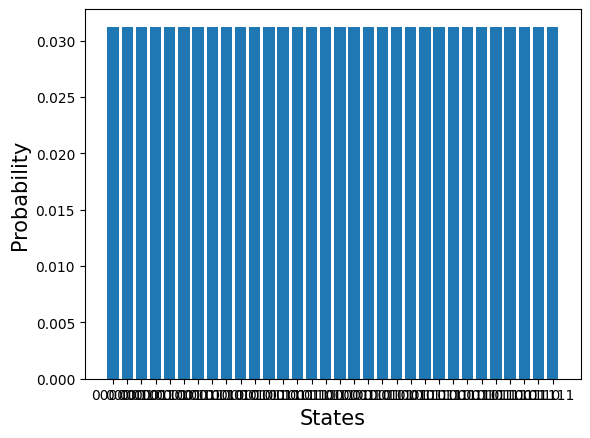

In [7]:
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister
from qiskit.circuit.library import DiagonalGate
import numpy as np
from qiskit.quantum_info import Statevector
cr1 = ClassicalRegister(5)
qr = QuantumRegister(5)
qc = QuantumCircuit(qr, cr1)
for i in range(0,5):
    qc.h(i)
    qc.barrier(i)
state = Statevector.from_instruction(qc)
print("First part:")
y1 = (np.abs(state.data**2))
print(y1)
x1 = ['00000', '00001','00010', '00011', '00100', '00101', '00110', '00111', '01000', '01001', '01010', '01011', '01100', '01101', '01110', '01111', '10000', '10001', '10010', '10011', '10100', '10101', '10110', '10111', '11000', '11001', '11010', '11011', '11100', '11101', '11110', '11111']
plt.bar(x1,y1)
plt.ylabel('Probability', size=15)
plt.xlabel('States', size =15)

Second part:
[0.87890625 0.00390625 0.00390625 0.00390625 0.00390625 0.00390625
 0.00390625 0.00390625 0.00390625 0.00390625 0.00390625 0.00390625
 0.00390625 0.00390625 0.00390625 0.00390625 0.00390625 0.00390625
 0.00390625 0.00390625 0.00390625 0.00390625 0.00390625 0.00390625
 0.00390625 0.00390625 0.00390625 0.00390625 0.00390625 0.00390625
 0.00390625 0.00390625]


Text(0.5, 0, 'States')

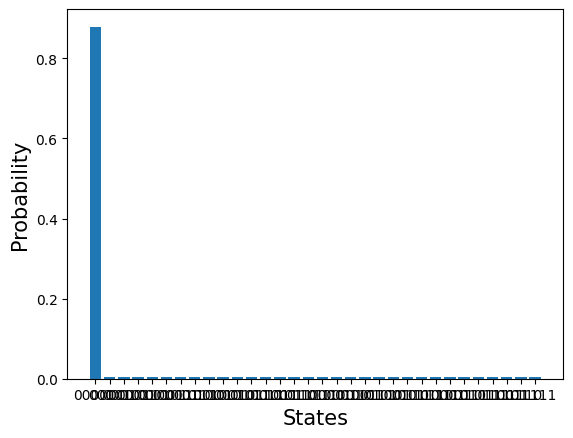

In [8]:
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister
from qiskit.circuit.library import DiagonalGate
import numpy as np
from qiskit.quantum_info import Statevector
cr1 = ClassicalRegister(5)
qr = QuantumRegister(5)
qc = QuantumCircuit(qr, cr1)
for i in range(0,5):
    qc.h(i)
    qc.barrier(i)
array = [1,-1]
for i in range(30):
    array.append(1) 
qc.append(DiagonalGate(array), [0,1,2,3,4])
for i in range(0,5):
    qc.h(i)
state = Statevector.from_instruction(qc)
print("Second part:")
y1 = (np.abs(state.data**2))
print(y1)
x1 = ['00000', '00001','00010', '00011', '00100', '00101', '00110', '00111', '01000', '01001', '01010', '01011', '01100', '01101', '01110', '01111', '10000', '10001', '10010', '10011', '10100', '10101', '10110', '10111', '11000', '11001', '11010', '11011', '11100', '11101', '11110', '11111']
plt.bar(x1,y1)
plt.ylabel('Probability', size=15)
plt.xlabel('States', size =15)


Final part:
[0.02392578 0.25830078 0.02392578 0.02392578 0.02392578 0.02392578
 0.02392578 0.02392578 0.02392578 0.02392578 0.02392578 0.02392578
 0.02392578 0.02392578 0.02392578 0.02392578 0.02392578 0.02392578
 0.02392578 0.02392578 0.02392578 0.02392578 0.02392578 0.02392578
 0.02392578 0.02392578 0.02392578 0.02392578 0.02392578 0.02392578
 0.02392578 0.02392578]


Text(0.5, 0, 'States')

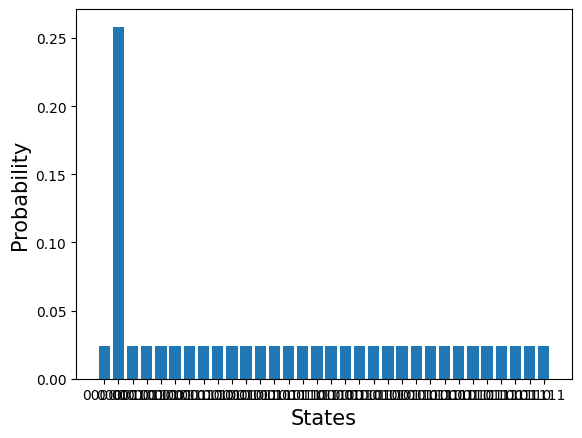

In [9]:
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister
from qiskit.circuit.library import DiagonalGate
import numpy as np
from qiskit.quantum_info import Statevector
cr1 = ClassicalRegister(5)
qr = QuantumRegister(5)
qc = QuantumCircuit(qr, cr1)
for i in range(0,5):
    qc.h(i)
    qc.barrier(i)
array = [1,-1]
for i in range(30):
    array.append(1) 
qc.append(DiagonalGate(array), [0,1,2,3,4])
for i in range(0,5):
    qc.h(i)
array2 = [1]
for j in range(31):
    array2.append(-1)
qc.append(DiagonalGate(array2), [0,1,2,3,4])
for i in range(0,5):
    qc.h(i)
    qc.barrier(i)
state = Statevector.from_instruction(qc)
print("Final part:")
y1 = (np.abs(state.data**2))
print(y1)
x1 = ['00000', '00001','00010', '00011', '00100', '00101', '00110', '00111', '01000', '01001', '01010', '01011', '01100', '01101', '01110', '01111', '10000', '10001', '10010', '10011', '10100', '10101', '10110', '10111', '11000', '11001', '11010', '11011', '11100', '11101', '11110', '11111']
plt.bar(x1,y1)
plt.ylabel('Probability', size=15)
plt.xlabel('States', size =15)

#### This part is an insight into a relationship between following iterations and probability of obtaining a desired state (here 00001).


Iteration 1:
[0.02392578 0.25830078 0.02392578 0.02392578 0.02392578 0.02392578
 0.02392578 0.02392578 0.02392578 0.02392578 0.02392578 0.02392578
 0.02392578 0.02392578 0.02392578 0.02392578 0.02392578 0.02392578
 0.02392578 0.02392578 0.02392578 0.02392578 0.02392578 0.02392578
 0.02392578 0.02392578 0.02392578 0.02392578 0.02392578 0.02392578
 0.02392578 0.02392578]
Iters. done:[Current cost:0.258300781250001]

Iteration 2:
[0.01282501 0.60242462 0.01282501 0.01282501 0.01282501 0.01282501
 0.01282501 0.01282501 0.01282501 0.01282501 0.01282501 0.01282501
 0.01282501 0.01282501 0.01282501 0.01282501 0.01282501 0.01282501
 0.01282501 0.01282501 0.01282501 0.01282501 0.01282501 0.01282501
 0.01282501 0.01282501 0.01282501 0.01282501 0.01282501 0.01282501
 0.01282501 0.01282501]
Iters. done:[Current cost:0.602424621582035]

Iteration 3:
[0.00332463 0.89693654 0.00332463 0.00332463 0.00332463 0.00332463
 0.00332463 0.00332463 0.00332463 0.00332463 0.00332463 0.00332463
 0.00332463 0.00

([<matplotlib.axis.XTick at 0x1c03b93a210>,
 [Text(1, 0, '1'),
  Text(2, 0, '2'),
  Text(3, 0, '3'),
  Text(4, 0, '4'),
  Text(5, 0, '5'),
  Text(6, 0, '6'),
  Text(7, 0, '7'),
  Text(8, 0, '8'),
  Text(9, 0, '9'),
  Text(10, 0, '10'),
  Text(11, 0, '11'),
  Text(12, 0, '12'),
  Text(13, 0, '13'),
  Text(14, 0, '14'),
  Text(15, 0, '15'),
  Text(16, 0, '16'),
  Text(17, 0, '17'),
  Text(18, 0, '18'),
  Text(19, 0, '19'),
  Text(20, 0, '20')])

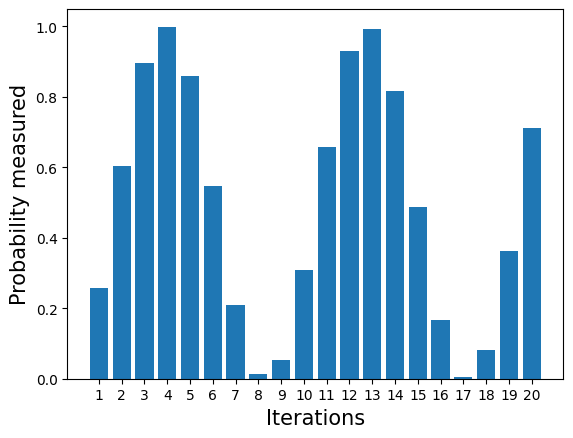

In [10]:
cost_history_dict0 = {"cost_history": []}
qc3 = QuantumCircuit(5)
qc3.h([0,1,2,3,4])

for k in range(0,20):
        array = [1,-1]
        for i in range(30):
            array.append(1) 
        qc3.append(DiagonalGate(array), [0,1,2,3,4])
        for i in range(0,5):
             qc3.h(i)
        array2 = [1]
        for j in range(31):
            array2.append(-1)
        qc3.append(DiagonalGate(array2), [0,1,2,3,4])
        for i in range(0,5):
            qc3.h(i)
            qc3.barrier(i)
        state = Statevector.from_instruction(qc3)
        print(f"\nIteration {k+1}:")
        result = np.round(abs(state.data)**2, 15)
        print(result)
        aim = result[1]
        cost_history_dict0["cost_history"].append(aim)
        print(f"Iters. done:[Current cost:{aim}]")

y11 = list(cost_history_dict0.values())
converted = [[float(x) for x in row] for row in y11]
y1 = converted[0]
print(y1)

x1 = []
for i in range(0,20):
    a = 1
    a += i
    x1.append(a)

plt.bar(x1,y1)
plt.ylabel('Probability measured', size=15)
plt.xlabel('Iterations' , size=15)
plt.xticks(np.arange(min(x1), max(x1) + 1, 1))


3.942882938158366


([<matplotlib.axis.XTick at 0x1c03ddd2ad0>,
 [Text(1, 0, '1'),
  Text(2, 0, '2'),
  Text(3, 0, '3'),
  Text(4, 0, '4'),
  Text(5, 0, '5'),
  Text(6, 0, '6'),
  Text(7, 0, '7'),
  Text(8, 0, '8'),
  Text(9, 0, '9'),
  Text(10, 0, '10'),
  Text(11, 0, '11'),
  Text(12, 0, '12'),
  Text(13, 0, '13'),
  Text(14, 0, '14'),
  Text(15, 0, '15'),
  Text(16, 0, '16'),
  Text(17, 0, '17'),
  Text(18, 0, '18'),
  Text(19, 0, '19'),
  Text(20, 0, '20')])

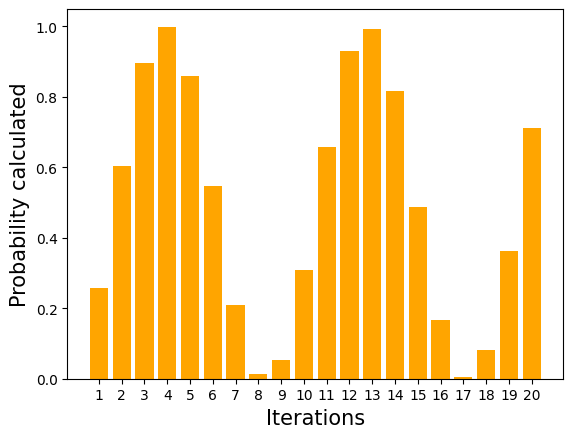

In [11]:
import math as mt

number_qubits = 2**5 
number_solutions = 1 
k_opt = (np.pi / 4) * np.sqrt(number_qubits / number_solutions) - 1/2 
print(k_opt)

y2 = []
for i in range(1,21):
    prob = (np.sin((2*i + 1)*mt.acos(np.sqrt((32 - 1) / 32))))**2
    y2.append(prob)

plt.bar(x1,y2, color='orange')
plt.ylabel('Probability calculated', size=15)
plt.xlabel('Iterations', size=15)
plt.xticks(np.arange(min(x1), max(x1) + 1, 1))


Iteration 2:
{'11010': 19, '01010': 23, '00001': 271, '00010': 26, '01101': 19, '01110': 29, '00011': 21, '10010': 32, '01001': 32, '11100': 29, '10101': 26, '11111': 27, '00101': 20, '10110': 19, '00111': 24, '01000': 26, '00110': 25, '10011': 29, '10001': 24, '01111': 22, '10000': 20, '11011': 23, '00100': 25, '10100': 23, '10111': 21, '11001': 29, '11110': 27, '11000': 24, '00000': 19, '11101': 28, '01011': 22, '01100': 20}
Iters. done:[Current cost:271]

Iteration 3:
{'11001': 17, '00001': 599, '00101': 15, '11101': 22, '10100': 11, '11110': 12, '00011': 9, '11011': 15, '01110': 10, '01001': 15, '01010': 8, '11111': 16, '10101': 17, '11000': 20, '00010': 15, '00110': 17, '01011': 15, '00000': 17, '10111': 12, '01100': 10, '11010': 14, '00100': 14, '10011': 20, '01101': 13, '11100': 19, '01000': 7, '00111': 12, '10000': 11, '01111': 9, '10110': 13, '10001': 14, '10010': 6}
Iters. done:[Current cost:599]

Iteration 4:
{'11000': 3, '10000': 4, '00001': 917, '11111': 3, '00111': 5, '0

([<matplotlib.axis.XTick at 0x22b8085b4d0>,
 [Text(1, 0, '1'),
  Text(2, 0, '2'),
  Text(3, 0, '3'),
  Text(4, 0, '4'),
  Text(5, 0, '5'),
  Text(6, 0, '6'),
  Text(7, 0, '7'),
  Text(8, 0, '8'),
  Text(9, 0, '9'),
  Text(10, 0, '10'),
  Text(11, 0, '11'),
  Text(12, 0, '12'),
  Text(13, 0, '13'),
  Text(14, 0, '14'),
  Text(15, 0, '15'),
  Text(16, 0, '16')])

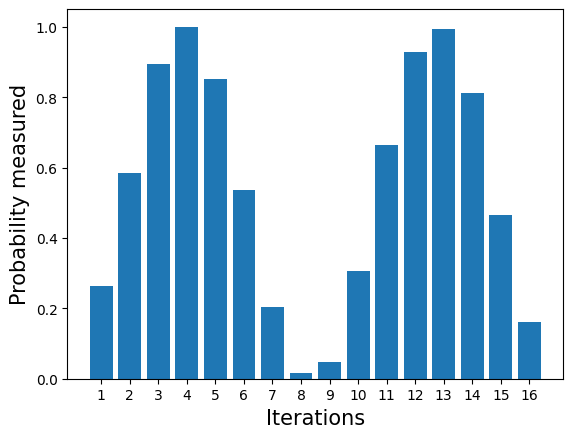

In [23]:
import numpy as np

backend = Aer.get_backend('aer_simulator')
cost_history_dict0 = {"cost_history": []}
cr1 = ClassicalRegister(5)
qr1 = QuantumRegister(5)

for k in range(1,17):
    qc = QuantumCircuit(qr1, cr1)
    qc.h([0,1,2,3,4])    
    for _ in range(k):    
        array = [1,-1]
        for i in range(30):
            array.append(1) 
        qc.append(DiagonalGate(array), [0,1,2,3,4])
        for i in range(0,5):
            qc.h(i)
        array2 = [1]
        for j in range(31):
            array2.append(-1)
        qc.append(DiagonalGate(array2), [0,1,2,3,4])
        for i in range(0,5):
            qc.h(i)
    qc.measure([0,1,2,3,4], cr1)
    qc1_tr = transpile(qc, backend)
    job = backend.run([qc1_tr])
    results = job.result().get_counts()
    print(f"\nIteration {k+1}:")
    print(results)
    aim = results['00001']
    cost_history_dict0["cost_history"].append(aim)
    print(f"Iters. done:[Current cost:{aim}]")
    
y11 = list(cost_history_dict0.values())
converted = [[float(x) for x in row] for row in y11]
y1 = converted[0]
print(y1)

x1 = []
for i in range(0,16):
    a = 1
    a += i
    x1.append(a)

y_pr = []
for i in y1:
    x = i / 1024
    y_pr.append(x)   

plt.bar(x1,y_pr)
plt.ylabel('Probability measured', size=15)
plt.xlabel('Iterations' , size=15)
plt.xticks(np.arange(min(x1), max(x1) + 1, 1))


In [4]:
import numpy as np
from qiskit_ibm_runtime import QiskitRuntimeService
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager
from qiskit_ibm_runtime import SamplerV2 as Sampler

backend_name = "ibm_torino"
backend1 = QiskitRuntimeService().backend(backend_name)
pass_manager = generate_preset_pass_manager(optimization_level=1, backend=backend1) 
sampler = Sampler(backend1)

In [ ]:
cost_history_dict1 = {"cost_history": []}
cr1 = ClassicalRegister(5)
qr1 = QuantumRegister(5)

for k in range(1,17):
    qc = QuantumCircuit(qr1, cr1)
    qc.h([0,1,2,3,4])    
    for _ in range(k):    
        array = [1,-1]
        for i in range(30):
            array.append(1) 
        qc.append(DiagonalGate(array), [0,1,2,3,4])
        for i in range(0,5):
            qc.h(i)
        array2 = [1]
        for j in range(31):
            array2.append(-1)
        qc.append(DiagonalGate(array2), [0,1,2,3,4])
        for i in range(0,5):
            qc.h(i)
    qc.measure([0,1,2,3,4], cr1)
    qc1_tr = pass_manager.run([qc])
    job = sampler.run([qc1_tr])
    print(f"\nIteration {k+1}:")
    cost_history_dict0["cost_history"].append(job)
    print(f"Iters. done:[Current cost:{job}]")
    
print(cost_history_dict1)


Iteration 2:
Iters. done:[Current cost:<RuntimeJobV2('d5n9vtk8d8hc73chgqrg', 'sampler')>]

Iteration 3:
Iters. done:[Current cost:<RuntimeJobV2('d5n9vu48d8hc73chgqs0', 'sampler')>]

Iteration 4:
Iters. done:[Current cost:<RuntimeJobV2('d5n9vubh36vs73bj2950', 'sampler')>]

Iteration 5:
Iters. done:[Current cost:<RuntimeJobV2('d5n9vuk8d8hc73chgqt0', 'sampler')>]

Iteration 6:
Iters. done:[Current cost:<RuntimeJobV2('d5n9vuph2mqc739bovp0', 'sampler')>]

Iteration 7:
Iters. done:[Current cost:<RuntimeJobV2('d5n9vv9h2mqc739bovqg', 'sampler')>]

Iteration 8:
Iters. done:[Current cost:<RuntimeJobV2('d5n9vvph2mqc739bovrg', 'sampler')>]

Iteration 9:
Iters. done:[Current cost:<RuntimeJobV2('d5na0048d8hc73chgr0g', 'sampler')>]

Iteration 10:
Iters. done:[Current cost:<RuntimeJobV2('d5na00l9j2ac739lndug', 'sampler')>]

Iteration 11:
Iters. done:[Current cost:<RuntimeJobV2('d5na00s8d8hc73chgr1g', 'sampler')>]

Iteration 12:
Iters. done:[Current cost:<RuntimeJobV2('d5na01d9j2ac739lndvg', 'sampler'

TypeError: float() argument must be a string or a real number, not 'RuntimeJobV2'

([<matplotlib.axis.XTick at 0x22b800d1e50>,
 [Text(1, 0, '1'),
  Text(2, 0, '2'),
  Text(3, 0, '3'),
  Text(4, 0, '4'),
  Text(5, 0, '5'),
  Text(6, 0, '6'),
  Text(7, 0, '7'),
  Text(8, 0, '8'),
  Text(9, 0, '9'),
  Text(10, 0, '10'),
  Text(11, 0, '11'),
  Text(12, 0, '12'),
  Text(13, 0, '13'),
  Text(14, 0, '14'),
  Text(15, 0, '15')])

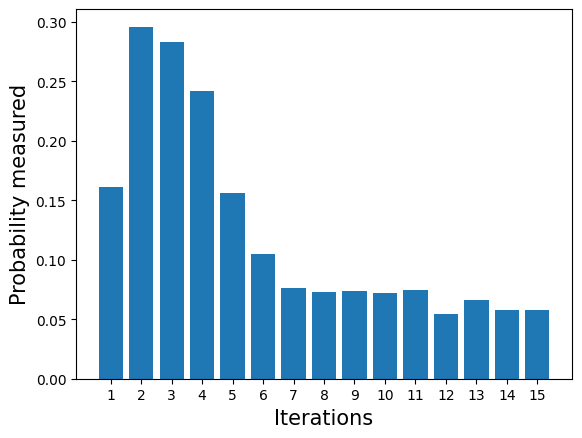

In [14]:
import matplotlib.pyplot as plt

service = QiskitRuntimeService()

Id2 = "d5n9vtk8d8hc73chgqrg"
Id3 = "d5n9vu48d8hc73chgqs0"
Id4 = "d5n9vubh36vs73bj2950"
Id5 = "d5n9vuk8d8hc73chgqt0"
Id6 = "d5n9vuph2mqc739bovp0"
Id7 = "d5n9vv9h2mqc739bovqg"
Id8 = "d5n9vvph2mqc739bovrg"
Id9 = "d5na0048d8hc73chgr0g"
Id10 = "d5na00l9j2ac739lndug"
Id11 = "d5na01d9j2ac739lndvg"
Id12 = "d5na01rh36vs73bj29a0"
Id13 = "d5na029h2mqc739bovv0"
Id14 = "d5na02ph2mqc739bp000"
Id15 = "d5na0348d8hc73chgr5g"
Id16 = "d5na03hh2mqc739bp010"


lista1 = [Id2, Id3, Id4, Id5, Id6, Id7, Id8, Id9, Id10, Id11, Id12, Id13, Id14, Id15, Id16]

counts = []
for i in lista1:
    job = service.job(i)
    result1 = job.result()
    qd = result1[0].data
    bitarray = qd.c9
    counts1 = bitarray.get_counts()
    x = counts1['00001']
    x1 = x / 4096
    counts.append(x1)

x1 = []
for i in range(0,15):
    a = 1
    a += i
    x1.append(a)  

plt.bar(x1, counts)
plt.ylabel('Probability measured', size=15)
plt.xlabel('Iterations' , size=15)
plt.xticks(np.arange(min(x1), max(x1) + 1, 1))